In [24]:
!pip install ultralytics



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained YOLOv8 model (YOLOv8n is the Nano version, you can also use 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x' for different sizes)
model = YOLO('yolov8n.pt')  # replace 'yolov8n.pt' with the desired model size



In [26]:
img_path = 'image5.jpg'
img = cv2.imread(img_path)


0: 448x640 1 person, 2 bicycles, 4 cars, 2 traffic lights, 171.0ms
Speed: 40.0ms preprocess, 171.0ms inference, 20.0ms postprocess per image at shape (1, 3, 448, 640)


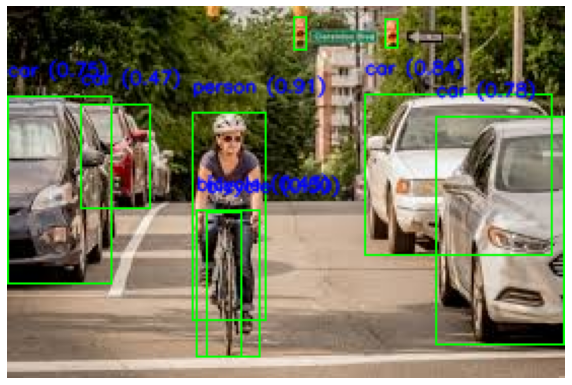

In [27]:
import cv2
import matplotlib.pyplot as plt

# Perform inference
results = model(img)

# Define font for text
font = cv2.FONT_HERSHEY_SIMPLEX

# Loop through detected boxes and display only those with confidence > 0.50
for result in results:
    boxes = result.boxes  # Detected bounding boxes
    for box in boxes:
        confidence = box.conf  # Confidence score (as tensor)

        # Only proceed if confidence is greater than 0.50
        if confidence.item() > 0.4:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # top-left and bottom-right coordinates
            
            # Get the class label (using the model's names)
            class_name = model.names[int(box.cls)]  # Class label

            # Draw the bounding box with a 1-pixel width
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 1)

            # Format the label to include class name and confidence score
            score_text = f"{class_name} ({confidence.item():.2f})"
            
            # Display class name and confidence score above the bounding box
            cv2.putText(img, score_text, (x1, y1 - 10), font, 0.3, (255, 0, 0), 1, cv2.LINE_AA)  # Blue text

# Display the image with bounding boxes and class names + confidence scores
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [28]:
img_path = 'plane.jpg'
img = cv2.imread(img_path)


0: 640x608 1 airplane, 128.6ms
Speed: 6.3ms preprocess, 128.6ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 608)


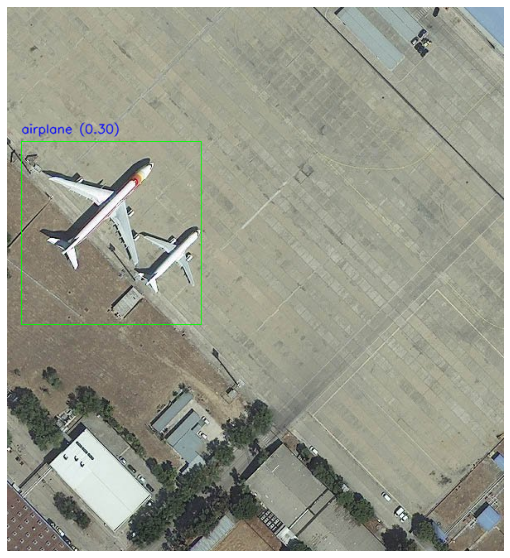

In [29]:
import cv2
import matplotlib.pyplot as plt

# Perform inference
results = model(img)

# Define font for text
font = cv2.FONT_HERSHEY_SIMPLEX

# Loop through detected boxes and display only those with confidence > 0.50
for result in results:
    boxes = result.boxes  # Detected bounding boxes
    for box in boxes:
        confidence = box.conf  # Confidence score (as tensor)

        # Only proceed if confidence is greater than 0.50
        if confidence.item() > 0.20:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # top-left and bottom-right coordinates
            
            # Get the class label (using the model's names)
            class_name = model.names[int(box.cls)]  # Class label

            # Draw the bounding box with a 1-pixel width
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 1)

            # Format the label to include class name and confidence score
            score_text = f"{class_name} ({confidence.item():.2f})"
            
            # Display class name and confidence score above the bounding box
            cv2.putText(img, score_text, (x1, y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)  # Blue text

# Display the image with bounding boxes and class names + confidence scores
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [30]:
img_path = 'image4.jpg'
img = cv2.imread(img_path)


0: 480x640 2 persons, 2 boats, 167.2ms
Speed: 6.4ms preprocess, 167.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


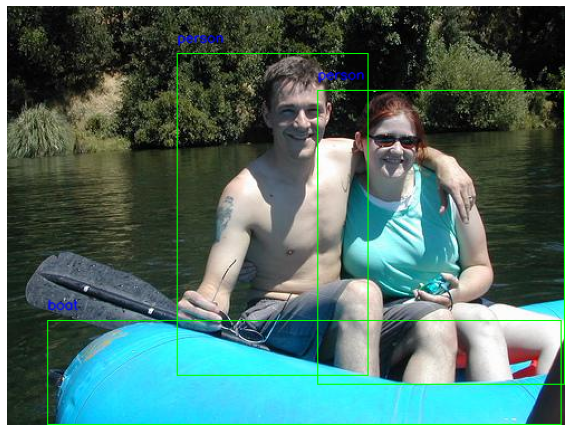

In [31]:
# Perform inference
results = model(img)

# Define font for text
font = cv2.FONT_HERSHEY_SIMPLEX

# Loop through detected boxes and display only those with confidence > 0.90
for result in results:
    boxes = result.boxes  # Detected bounding boxes
    for box in boxes:
        confidence = box.conf  # Confidence score (as tensor)

        # Only proceed if confidence is greater than 0.90
        if confidence.item() > 0.30:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # top-left and bottom-right coordinates
            class_name = model.names[int(box.cls)]  # Class label

            # Draw the bounding box with 1-pixel width
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 1)

            # Display class name and confidence above the bounding box
            label_text = f"{class_name}"
            cv2.putText(img, label_text, (x1, y1 - 10), font, 0.4, (255, 0, 0), 1, cv2.LINE_AA)  # Blue text

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor
from PIL import Image
from pycocotools.coco import COCO
import os
import numpy as np

# Load the pre-trained DETR model and processor
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model.eval()

# Paths
ann_file = r'C:\Users\LENOVO\Practices\nf2\subset_annotations.json'  # Replace with the path to COCO annotations
image_dir = r'C:\Users\LENOVO\Practices\nf2'  # Replace with the path to your image folder

# Load COCO annotations
coco = COCO(ann_file)

# Define IoU calculation
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea

    return interArea / unionArea

# IoU threshold
iou_threshold = 0.6

# Metrics
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0

# Process each image
image_ids = coco.getImgIds()
for img_id in image_ids:
    # Load image and annotations
    img_info = coco.loadImgs(img_id)[0]
    image_path = os.path.join(image_dir, img_info['file_name'])
    image = Image.open(image_path).convert("RGB")

    # Preprocess image
    inputs = processor(images=image, return_tensors="pt")
    
    # Ground truth boxes
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    true_boxes = [ann["bbox"] for ann in anns]  # [x, y, w, h]
    true_boxes = [[x, y, x + w, y + h] for x, y, w, h in true_boxes]  # Convert to [x1, y1, x2, y2]

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Post-process predictions
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

    pred_boxes = results["boxes"].cpu().numpy()
    pred_scores = results["scores"].cpu().numpy()

    # Filter predictions by score threshold
    score_threshold = 0.9
    pred_boxes = pred_boxes[pred_scores > score_threshold]
    pred_scores = pred_scores[pred_scores > score_threshold]

    # Match predictions to ground truth
    matched_true_boxes = set()
    true_positives = 0
    false_positives = 0

    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_idx = None
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = i
        
        if best_iou >= iou_threshold and best_gt_idx not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_idx)
        else:
            false_positives += 1

    # Count false negatives
    false_negatives = len(true_boxes) - len(matched_true_boxes)

    total_true_positives += true_positives
    total_false_positives += false_positives
    total_false_negatives += false_negatives

    print(f"Image: {img_info['file_name']} - TP: {true_positives}, FP: {false_positives}, FN: {false_negatives}")

# Calculate precision and recall
precision = total_true_positives / (total_true_positives + total_false_positives) if (total_true_positives + total_false_positives) > 0 else 0
recall = total_true_positives / (total_true_positives + total_false_negatives) if (total_true_positives + total_false_negatives) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


loading annotations into memory...
Done (t=3.90s)
creating index...
index created!
Image: 2008_000138_jpg.rf.824d644432d3ca8bd695c98917a539f3.jpg - TP: 3, FP: 0, FN: 3
Image: 2011_004188_jpg.rf.4e0be9332df979cfe5c206341acb9c4a.jpg - TP: 1, FP: 3, FN: 0
Image: 2011_006966_jpg.rf.b95914fd1c0f6a78b14702065636b085.jpg - TP: 4, FP: 7, FN: 0
Image: 2008_003841_jpg.rf.593479a56eecc9d9b20d5dcf1bb9e006.jpg - TP: 1, FP: 0, FN: 0
Image: 2010_006329_jpg.rf.f43fa1b2045931bb4fad2f873e377b45.jpg - TP: 0, FP: 8, FN: 1
Image: 2008_001026_jpg.rf.133bbe5ff82e330061956672f128a946.jpg - TP: 1, FP: 0, FN: 0
Image: 2009_000351_jpg.rf.e806c5c3ea3c9e59b894ddbc48305c4c.jpg - TP: 1, FP: 1, FN: 0
Image: 2010_005734_jpg.rf.83b7cb1975b242f715453de44929f96e.jpg - TP: 0, FP: 3, FN: 1
Image: 2012_001339_jpg.rf.c37324faf84b89aa06e30caa1c02d3b1.jpg - TP: 1, FP: 0, FN: 0
Image: 2009_002387_jpg.rf.28ec73b5385a9853b43e8626619c68cd.jpg - TP: 1, FP: 0, FN: 0
Image: 2010_004370_jpg.rf.f66d5598ee5d40ffec2229aa083432a6.jpg - TP

In [33]:
f1_score = (2 * (precision*recall)) / (precision+recall)

# Print the F1 score
print(f"F1 Score: {f1_score:.4f}")

F1 Score: 0.5793


In [20]:
import torch
from PIL import Image
import os
import numpy as np

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea
    return iou

# Paths
image_dir = r'C:\Users\LENOVO\Practices\val\images'  # Folder containing original images
label_dir = r'C:\Users\LENOVO\Practices\val\labels'  # Folder containing label files

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.6

# For calculating precision
total_true_positives = 0
total_false_positives = 0

# Get all image filenames (assuming they have corresponding label files)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Load image
    image = Image.open(image_path).convert('RGB')

    # Ground truth annotations (from label file)
    true_boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                cls_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                
                # Convert from YOLO format (x_center, y_center, width, height) to (x1, y1, x2, y2)
                x1 = (x_center - width / 2) * image.width
                y1 = (y_center - height / 2) * image.height
                x2 = (x_center + width / 2) * image.width
                y2 = (y_center + height / 2) * image.height
                
                true_boxes.append([x1, y1, x2, y2])

    # Transform the image
    image_tensor = T.ToTensor()(image).unsqueeze(0)

    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)

    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores

    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.9
    pred_boxes = pred_boxes[pred_scores > score_threshold]

    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0

    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None

        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1

    total_true_positives += true_positives
    total_false_positives += false_positives

    print(f"Processed image: {image_file} - True Positives: {true_positives}, False Positives: {false_positives}")

# Calculate Precision
precision = total_true_positives / (total_true_positives + total_false_positives)

print(f"Overall Precision: {precision:.4f}")


NameError: name 'T' is not defined